In [1]:
from data_preprocessing import create_extended_dataframe
from utilities import plo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### GET EXTENDED DATASET, RESEMBLE FIGURE FROM PAPER

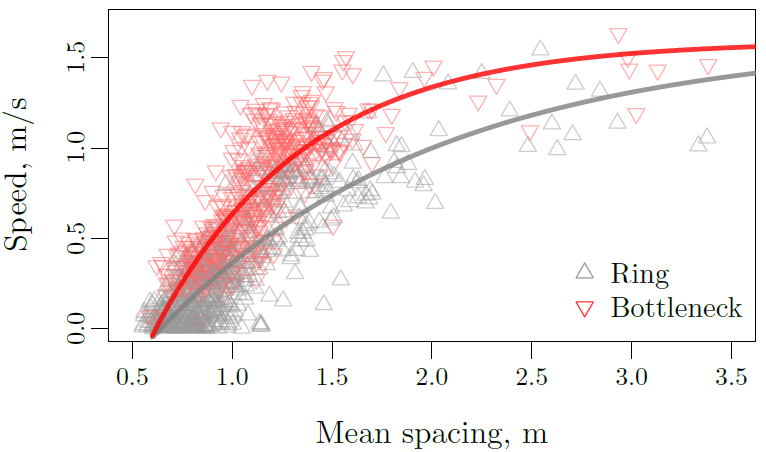

In [2]:
def fd_exec(m_s, v0, T, l):
    return v0 * (1 - np.exp((l - m_s) / (v0 * T)))

In [3]:
path = "../data/dataset_corridor_30"
dataset = pd.read_pickle(path)
dataset.head()

,SPEED,MEAN_SPACING,KNN_RELATIVE_POSITIONS
752,0.976187,5.698636,"[0.562466, 0.6647799999999995, 0.708253, 1.420..."
753,0.988093,5.69041,"[0.5622, 0.6841800000000005, 0.746570000000000..."
754,1.010181,5.681211,"[0.5727180000000001, 0.6986500000000007, 0.783..."
755,0.997903,5.674287,"[0.59061, 0.7074099999999994, 0.82171299999999..."
756,0.969367,5.66749,"[0.6122000000000001, 0.7138900000000001, 0.851..."


Text(0, 0.5, 'v')

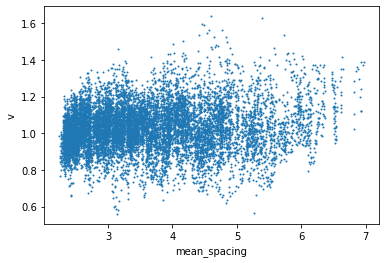

In [15]:
speed_cm = dataset['SPEED'].to_numpy()
mean_spacing_cm = dataset['MEAN_SPACING'].to_numpy()
c_v0 = 1.6
c_T = 0.86
c_l = 0.64
fd_res = []
mean_spacing_linspace = np.linspace(0.6, max(mean_spacing_cm), 1000)
for m_s in mean_spacing_linspace:
    fd_res.append(fd_exec(m_s, c_v0, c_T, c_l))
speed_cm_times_mean = [speed_cm[i] * mean_spacing_cm[i] for i in range(len(mean_spacing_cm))]
# mean_spacing_cm_times_speed = [(1/speed_cm[i]) * mean_spacing_cm[i] for i in range(len(mean_spacing_cm))]
plt.scatter(mean_spacing_cm, speed_cm, s=1)
# plt.scatter(mean_spacing_linspace, fd_res, s=1)
# plt.xlim(0,3.5)
plt.xlabel("mean_spacing")
plt.ylabel("v")

### TRY TO FIT FD MODEL

In [5]:
from utilities import plot_fd_and_speeds, read_dataset
path_1 = "../data/vadere_bottleneck_100_90"
path_2 = "../data/dataset_corridor_30"
data1 = read_dataset(path_1, fd_training=False)
data2 = read_dataset(path_2, fd_training=False)
data1[0].shape, data2[0].shape

((733, 21), (10976, 21))

Epoch 1/50
23/23 [==============================] - 0s 1ms/step - loss: 0.3254
Epoch 2/50
23/23 [==============================] - 0s 1ms/step - loss: 0.3028
Epoch 3/50
23/23 [==============================] - 0s 1ms/step - loss: 0.2832
Epoch 4/50
23/23 [==============================] - 0s 1ms/step - loss: 0.2649
Epoch 5/50
23/23 [==============================] - 0s 977us/step - loss: 0.2476
Epoch 6/50
23/23 [==============================] - 0s 928us/step - loss: 0.2312
Epoch 7/50
23/23 [==============================] - 0s 887us/step - loss: 0.2159
Epoch 8/50
23/23 [==============================] - 0s 990us/step - loss: 0.2018
Epoch 9/50
23/23 [==============================] - 0s 997us/step - loss: 0.1891
Epoch 10/50
23/23 [==============================] - 0s 1ms/step - loss: 0.1780
Epoch 11/50
23/23 [==============================] - 0s 1ms/step - loss: 0.1684
Epoch 12/50
23/23 [==============================] - 0s 902us/step - loss: 0.1605
Epoch 13/50
23/23 [==================

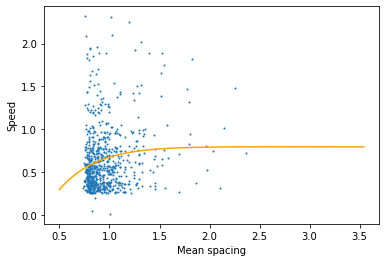

In [13]:
from fd_model_nn import FD_Network
fd_data, fd_targets = read_dataset(path_1, fd_training=True)
# train the FD model
model = FD_Network()
model.compile(optimizer='sgd', loss='mse')
hist = model.fit(x=fd_data, y=fd_targets, epochs=50)
stop = np.max(fd_data) * 1.5
mean_spacings = np.expand_dims(np.linspace(start=0.5, stop=stop, num=1000), axis=1)
fd_speeds = model.predict(x=mean_spacings)
plt.plot(mean_spacings, fd_speeds, c='orange')
plt.scatter(fd_data, fd_targets, s=1)
plt.xlabel("Mean spacing")
plt.ylabel("Speed")
# fig.suptitle(plot_title)
plt.show()

Epoch 1/100
23/23 [==============================] - 0s 909us/step - loss: 0.5274
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3106
Epoch 3/100
23/23 [==============================] - 0s 844us/step - loss: 0.2688
Epoch 4/100
23/23 [==============================] - 0s 982us/step - loss: 0.2429
Epoch 5/100
23/23 [==============================] - 0s 963us/step - loss: 0.2232
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2068
Epoch 7/100
23/23 [==============================] - 0s 976us/step - loss: 0.1930
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1813
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1713
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1631
Epoch 11/100
23/23 [==============================] - 0s 964us/step - loss: 0.1563
Epoch 12/100
23/23 [==============================] - 0s 954us/step - loss: 0.1509
Epoch 13/100
23/23 [===

23/23 [==============================] - 0s 818us/step - loss: 0.1346
Epoch 1/50
23/23 [==============================] - 0s 955us/step - loss: 0.5532
Epoch 2/50
23/23 [==============================] - 0s 999us/step - loss: 0.2410
Epoch 3/50
23/23 [==============================] - 0s 962us/step - loss: 0.1921
Epoch 4/50
23/23 [==============================] - 0s 845us/step - loss: 0.1819
Epoch 5/50
23/23 [==============================] - 0s 789us/step - loss: 0.1776
Epoch 6/50
23/23 [==============================] - 0s 792us/step - loss: 0.1744
Epoch 7/50
23/23 [==============================] - 0s 897us/step - loss: 0.1718
Epoch 8/50
23/23 [==============================] - 0s 811us/step - loss: 0.1693
Epoch 9/50
23/23 [==============================] - 0s 817us/step - loss: 0.1671
Epoch 10/50
23/23 [==============================] - 0s 749us/step - loss: 0.1651
Epoch 11/50
23/23 [==============================] - 0s 793us/step - loss: 0.1632
Epoch 12/50
23/23 [==================

D:\UniPi\erasmus\courses\MLCS\MLCMS-project\src\utilities.py:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


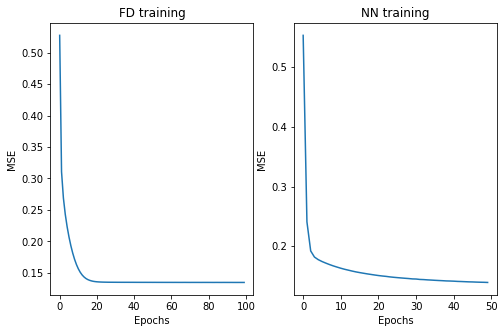

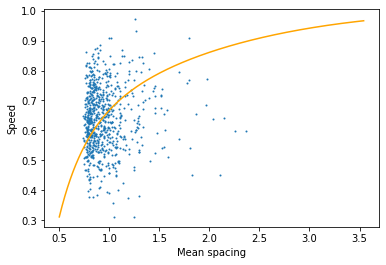

In [14]:
from utilities import plot_fd_and_speeds
plot_fd_and_speeds(path_1, fd_epochs=100)

Epoch 1/15
343/343 [==============================] - 1s 715us/step - loss: 0.0462
Epoch 2/15
343/343 [==============================] - 0s 695us/step - loss: 0.0200
Epoch 3/15
343/343 [==============================] - 0s 664us/step - loss: 0.0178
Epoch 4/15
343/343 [==============================] - 0s 704us/step - loss: 0.0167
Epoch 5/15
343/343 [==============================] - 0s 643us/step - loss: 0.0161
Epoch 6/15
343/343 [==============================] - 0s 733us/step - loss: 0.0157
Epoch 7/15
343/343 [==============================] - 0s 732us/step - loss: 0.0155
Epoch 8/15
343/343 [==============================] - 0s 706us/step - loss: 0.0154
Epoch 9/15
343/343 [==============================] - 0s 694us/step - loss: 0.0153
Epoch 10/15
343/343 [==============================] - 0s 721us/step - loss: 0.0152
Epoch 11/15
343/343 [==============================] - 0s 703us/step - loss: 0.0151
Epoch 12/15
343/343 [==============================] - 0s 705us/step - loss: 0.0151
E

D:\UniPi\erasmus\courses\MLCS\MLCMS-project\src\utilities.py:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


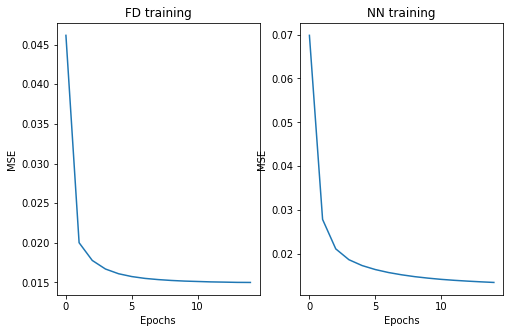

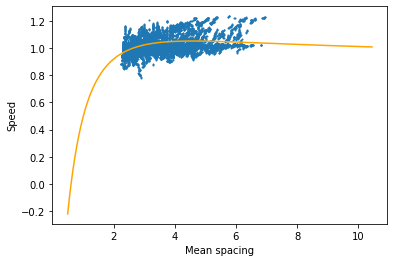

In [7]:
epochs=15
plot_fd_and_speeds(path_2,fd_epochs=epochs,nn_epochs=epochs)

### TRY OTHER DATASET

In [8]:
corridor_file = "../data/corridor_15_filtered_10-nn_dataframe"
column_names = ['MEAN_SPACING', 'OTHER_POSITIONS', 'SPEED']
corridor_df = pd.read_csv(corridor_file, header=None, sep=" ", names=column_names)
corridor_df.head()
# extended_corridor_df = create_extended_dataframe(corridor_file)
# extended_corridor_df['MEAN_SPACING'] = extended_corridor_df['MEAN_SPACING'].astype(float)

FileNotFoundError: [Errno 2] No such file or directory: '../data/corridor_15_filtered_10-nn_dataframe'

In [ ]:
frame_old, pid_old = corridor_df.iloc[0]['FRAME'], corridor_df.iloc[0]['ID']
for i, r in corridor_df.iloc[1:].iterrows():
    frame, pid = r['FRAME'], r['ID']
    if frame-frame_old != 1 and pid == pid_old:
        print(r)
    frame_old, pid_old = frame, pid

In [ ]:
extended_corridor_df = corridor_df
speed_cm = extended_corridor_df['SPEED'].to_numpy()
mean_spacing_cm = extended_corridor_df['MEAN_SPACING'].to_numpy()
c_v0 = 1.6
c_T = 0.86
c_l = 0.64
fd_res = []
mean_spacing_linspace = np.linspace(0.6, max(mean_spacing_cm), 1000)
for m_s in mean_spacing_linspace:
    fd_res.append(fd_exec(m_s, c_v0, c_T, c_l))
plt.scatter(mean_spacing_cm, speed_cm, s=1)
# plt.scatter(mean_spacing_linspace, fd_res, s=1)
# plt.xlim(0,3.5)
plt.xlabel("mean_spacing")
plt.ylabel("v")

# ATTEMPT WITH WEBSITELOADER

In [ ]:
corridor_file = "../data/others_data/website_generated/processed_ug-180-030_combined_MB.txt"
tmpRawdata = np.loadtxt(corridor_file, delimiter=" ", skiprows=1)
d = {}
d['FRAME'] = tmpRawdata[:,0]
d['ID'] = tmpRawdata[:,1]
d['SPEED'] = tmpRawdata[:,2]
d['MEAN_SPACING'] = tmpRawdata[:,3]
d['KNN'] = tmpRawdata[:,4:]

In [ ]:
extended_corridor_df = d
speed_cm = extended_corridor_df['SPEED']
mean_spacing_cm = extended_corridor_df['MEAN_SPACING']
c_v0 = 1.6
c_T = 0.86
c_l = 0.64
fd_res = []
# mean_spacing_linspace = np.linspace(0.6, max(mean_spacing_cm), 1000)
# for m_s in mean_spacing_linspace:
#     fd_res.append(fd_exec(m_s, c_v0, c_T, c_l))
plt.scatter(mean_spacing_cm, speed_cm, s=1)
# plt.scatter(mean_spacing_linspace, fd_res, s=1)
# plt.xlim(0,3.5)

In [ ]:
c_f = "../data/processed_ug-180-030.txt"
tmpRawdata = np.loadtxt(c_f, delimiter=" ", skiprows=1)
d = {}
d['FRAME'] = tmpRawdata[:,0]
d['ID'] = tmpRawdata[:,1]
d['SPEED'] = tmpRawdata[:,2]
d['MEAN_SPACING'] = tmpRawdata[:,3]
d['KNN'] = tmpRawdata[:,4:]